# MindTech: Modelling

### 1. Introduction
Building a machine learning model to predict whether a person is likely to seek mental health treatment based on their responses to a survey, using the 2014 Kaggle dataset that measures attitudes towards mental health and frequency of mental health disorders in the tech workplace. I want to see based on the data provided how people who need help can be predicted based on different factors, before their mental health deteriorates.This is a binary classification problem where the target variable is treatment, which indicates whether a person has sought mental health treatment. Since the outcome is categorical with two values ("Yes" or "No"), classification algorithms such as Logistic Regression and Random Forest

### 2. Preprocessing the data

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

df = pd.read_csv('updated_data.csv')
df.head()


,Age,Gender,self_employed,family_history,treatment,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview
0,46,Male,Yes,Yes,No,Yes,Yes,Yes,Not sure,Yes,Don't know,Yes,Very easy,No,No,Yes,Yes,No
1,36,Male,Yes,Yes,No,Yes,Yes,No,No,Yes,No,Yes,Somewhat easy,No,No,Some of them,Some of them,Maybe
2,29,Male,No,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Somewhat difficult,Maybe,No,Some of them,Some of them,No
3,31,Male,Yes,No,No,Yes,Yes,No,No,No,No,Yes,Somewhat difficult,No,No,Some of them,Some of them,No
4,46,Male,No,No,Yes,Yes,Yes,Yes,Yes,No,No,Don't know,Don't know,Maybe,No,Some of them,Yes,No


In [38]:
df.select_dtypes(include='object').columns

Index(['Gender', 'self_employed', 'family_history', 'treatment', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview'],
      dtype='object')

In [39]:
# label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['leave'] = le.fit_transform(df['leave'])
df.head()

,Age,Gender,self_employed,family_history,treatment,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview
0,46,Male,Yes,Yes,No,Yes,Yes,Yes,Not sure,Yes,Don't know,Yes,4,No,No,Yes,Yes,No
1,36,Male,Yes,Yes,No,Yes,Yes,No,No,Yes,No,Yes,2,No,No,Some of them,Some of them,Maybe
2,29,Male,No,Yes,Yes,No,Yes,Yes,Yes,No,No,No,1,Maybe,No,Some of them,Some of them,No
3,31,Male,Yes,No,No,Yes,Yes,No,No,No,No,Yes,1,No,No,Some of them,Some of them,No
4,46,Male,No,No,Yes,Yes,Yes,Yes,Yes,No,No,Don't know,0,Maybe,No,Some of them,Yes,No


In [40]:
mapping = {
    'Yes': 2,
    'Maybe': 1,
    'Some of them': 1,
    "Don't know": 1,
    "Not Sure" : 1,
    "Not sure" : 1,
    'No': 0
}

cols_to_map = ['self_employed', 'family_history','tech_company', 'treatment', 'remote_work', 'benefits', 'care_options', 'wellness_program','seek_help','anonymity','mental_health_consequence','phys_health_consequence','coworkers','supervisor','mental_health_interview']

for col in cols_to_map:
    df[col] = df[col].replace(mapping)

    
df.head()


,Age,Gender,self_employed,family_history,treatment,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview
0,46,Male,2,2,0,2,2,2,1,2,1,2,4,0,0,2,2,0
1,36,Male,2,2,0,2,2,0,0,2,0,2,2,0,0,1,1,1
2,29,Male,0,2,2,0,2,2,2,0,0,0,1,1,0,1,1,0
3,31,Male,2,0,0,2,2,0,0,0,0,2,1,0,0,1,1,0
4,46,Male,0,0,2,2,2,2,2,0,0,1,0,1,0,1,2,0


In [41]:
# one-hot encoding
df['Gender'] = df['Gender'].str.lower().str.strip()
common_genders = ['male', 'female']
df['Gender'] = df['Gender'].apply(lambda x: x if x in common_genders else 'other')
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)
df.head()

,Age,self_employed,family_history,treatment,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,Gender_male,Gender_other
0,46,2,2,0,2,2,2,1,2,1,2,4,0,0,2,2,0,True,False
1,36,2,2,0,2,2,0,0,2,0,2,2,0,0,1,1,1,True,False
2,29,0,2,2,0,2,2,2,0,0,0,1,1,0,1,1,0,True,False
3,31,2,0,0,2,2,0,0,0,0,2,1,0,0,1,1,0,True,False
4,46,0,0,2,2,2,2,2,0,0,1,0,1,0,1,2,0,True,False


### 3. Separating features and target
Features (X): The inputs you use to make predictions.
Target (y): The thing you're trying to predict (the label).

In [42]:
# Defining target column as treatment because I am trying to predict how different factors affect a person getting treatment
target_column = 'treatment'

X = df.drop(columns=[target_column])
y = df[target_column]

### 4. Split into training and testing sets
To train and evaluate fairly:

- Training set (80%): used to build the model
- Testing set (20%): used to check how well it performs on unseen data

Use **train_test_split** to split X and y.
This method shows if your model will generalize to new, real-world data.

- X_train , y_train : What your model learns from
- X_test, y_test : What is used to evaluate the models performance. Data that is used to cross reference between model generated value and actual values.
- test_size = 0.2 : 20% of the data will be used for testing. This cann be changed depending on the size of the data set. NBut for general cases the 80-20 rule is used.
- random_state : keeps the same split every time you run the code. The number 42 is just convention and random. It can honestly be any number.
- stratify = y : Ensures same proportion of classes (like 'Yes'/'No') in train & test

In [43]:
from sklearn.model_selection import train_test_split

# Use X and y from step 2.4
X_train, X_test, y_train, y_test = train_test_split(
    X, y,                 # your features and target
    test_size=0.2,        # 20% test, 80% train
    random_state=42,      # ensures reproducibility
    stratify=y            # keeps class balance (important for classification)
)

### 5.1 Logistic Regression
This machine learning model is for classification problems.
In this case classifying which elements are linked with a person seeking treatment.

max_iter: It sets the maximum number of iterations the Logistic Regression algorithm’s optimization solver will run to try to find the best model parameters (coefficients).
the defualt is set to 100 but for more compex datasets 1000 is used to prevent convergence warning. For complex data the model needs more steps/iterations to converge to an optimal solution.

In [44]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

#### 5.1.1 Model Evaluation

Logistic Regression Accuracy: 0.72
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.74      0.72       121
           2       0.73      0.70      0.71       125

    accuracy                           0.72       246
   macro avg       0.72      0.72      0.72       246
weighted avg       0.72      0.72      0.72       246



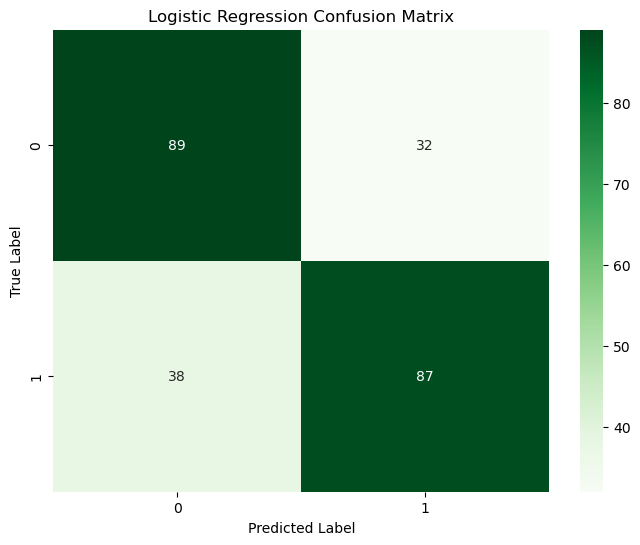

In [45]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [46]:
# checking for overffitting or underfitting. To find out whether your model is generalizing well to unseen data or not.
# comparing the training data and testing data together.

#train accuracy : How well your model performs on the data it was trained on (X_train, y_train)
#test accuracy : How well your model performs on new, unseen data (X_test, y_test)
print("Train Accuracy:", logreg.score(X_train, y_train))
print("Test Accuracy:", logreg.score(X_test, y_test))

Train Accuracy: 0.7125382262996942
Test Accuracy: 0.7154471544715447


The train and test accuracy scores are very similar to each other and this shows that the logistic regression model is generalizing well. this means it can be applied to knew data as well and not just copying previous patterns and applying them. So the model is not overfitting or underfitting.

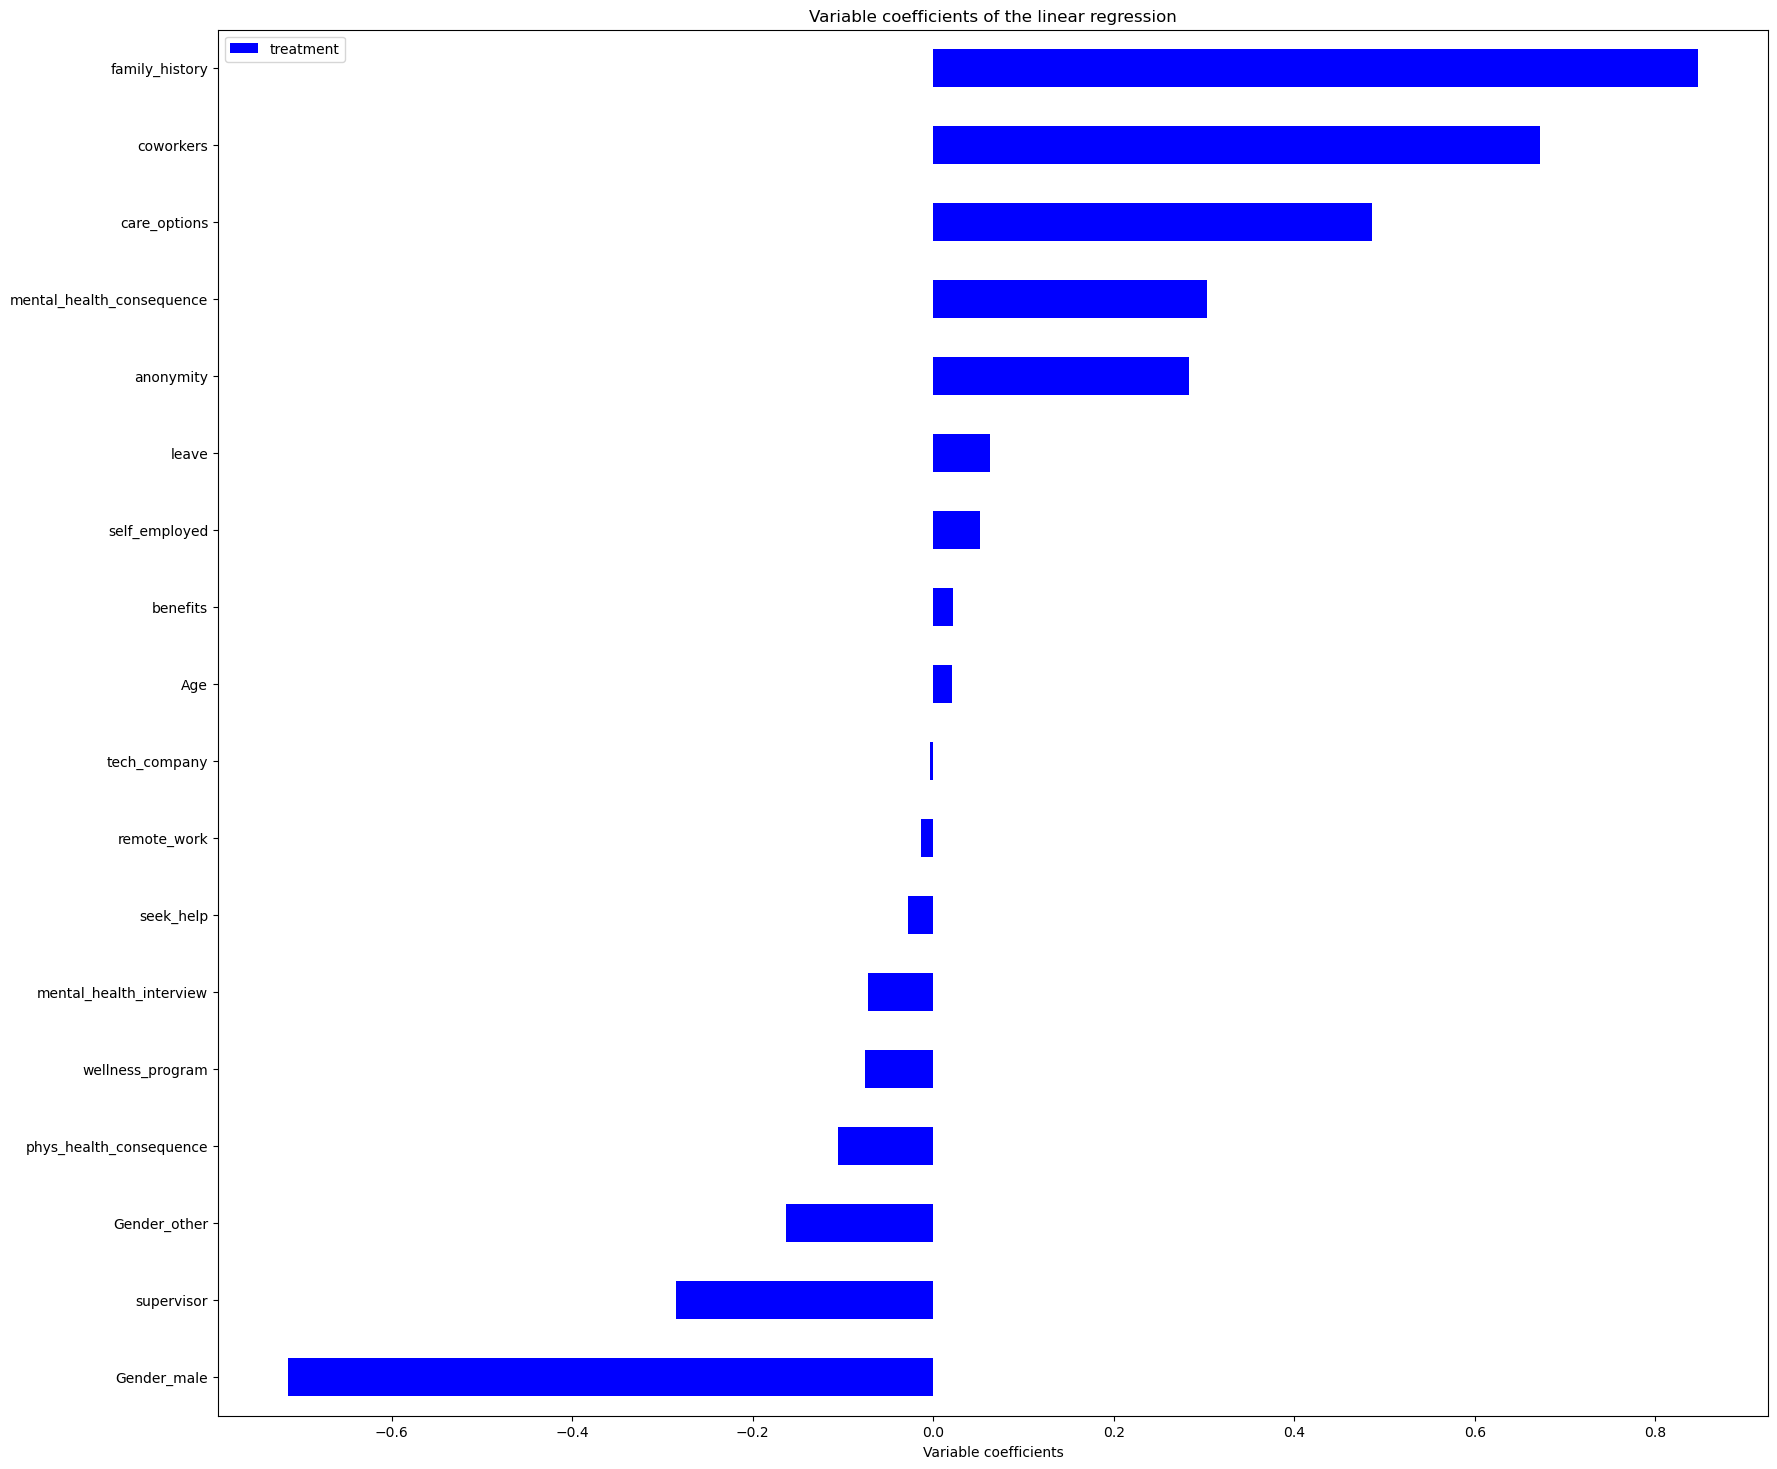

In [47]:
coefs = pd.DataFrame(logreg.coef_.reshape((18, 1)), 
                         index = X_train.columns.tolist(), columns = ['treatment'])
coefs = coefs.sort_values(by='treatment', ascending=True)
coefs.plot(kind='barh', figsize=(20,18), color = 'blue')
plt.xlabel('Variable coefficients')
plt.title('Variable coefficients of the linear regression')
plt.show()

### 5.2 Random Forest Classifier
Random Forest is a machine learning model that uses many decision trees to make better predictions. Each tree looks at different random parts of the data and their results are combined by voting for classification or averaging for regression. This helps in improving accuracy and reducing errors. This helps to reduce overfitting , handle missing values with greater accuracy and enables higher accuracy.

- n_estimators=100 (number of trees, default is 100)
- max_depth (to control tree size, avoid overfitting)

In [48]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)
y_pred_rd = rf_model.predict(X_test)


#### 5.2.1 Model Evaluation

Random Forest Accuracy: 0.70
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       121
           2       0.70      0.70      0.70       125

    accuracy                           0.70       246
   macro avg       0.70      0.70      0.70       246
weighted avg       0.70      0.70      0.70       246



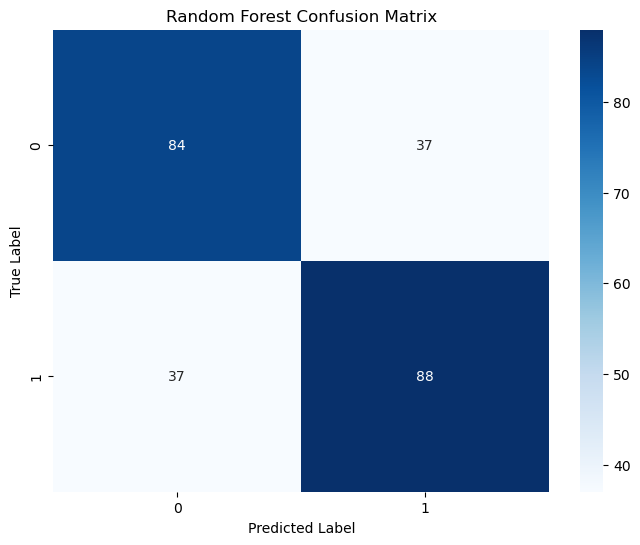

In [62]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_test, y_pred_rd)
print(f"Random Forest Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred_rd))

cm = confusion_matrix(y_test, y_pred_rd)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



In [63]:
print("Train Accuracy:", rf_model.score(X_train, y_train))
print("Test Accuracy:", rf_model.score(X_test, y_test))

Train Accuracy: 1.0
Test Accuracy: 0.6991869918699187


Classification report shows precision,recall,f1-score and support for each class the model is trying to predict.

- **Precision**: Out of all the predicted positives (predicted, not actual correct values), how many were actually correct
- **Recall**: Out of all the actual positives, how many were correctly predicted?
- **f1-score**:Mean of precision and recall. The average of the 2 values.
- **support**: number of actual samples for the class
- **accuracy**: overall how many predictions were right.

**Before tuning the random forest classifier achieves a moderate overall accuracy of 70%, with consistent F1-scores across both classes, indicating balanced but ni highly accurate predictions. Both class 0 and 2 have very similar precison, recall, and F1-scores. Thus showing that there is no bias toward either class. Thus the prediction quality of both classes are similar.However, given further improvements such as hyperparameter tuning, there will be better predictions.**


The training of the data is very good with 95% accuracy but the testing is not so good. So Overfitting is taking place here.
The random forest has memorized the training data too well but fails to generalize to new data.
To fix this the hyperparameters need to be tuned.

In machine learning, hyperparameters are settings you choose before training the model — they control the behavior and structure of the model.

for the random forest hyperparameters are:
- **n_estimators** : the number of trees in the forest. More trees= better performance but this means there is a higher chance of overfitting and longer time to train the model. By default is 100.

- **max_depth** : maximum depth of each tree. If the tree is too deep, risk of overfitting. To low risk of underfitting.

- **min_samples_split**: minimum number of samples required before splitting a node. So the higher the number of samples, the simpler the trees. By default it is 2.

- **max_features**: limits the number of features to consider when splitting a node. Helps to control overfitting.

- **max_leaf_nodes**: limits the number of leaf nodes in the tree hence controlling its size and complexity. none means it takes an unlimited number of nodes.

- **max_sample**: this determines how much of the dataset is given to each individual tree.

Tuning hyperparameters improves accuracy ,reduces overfitting or underfitting and make the model generlise better to new unseen data.

To do this use the libraray GridSearcgCV from sklearn

Cross validation: 
- If data is split into 80% training set and 20% testing set, you can split the the training set again.
- So within the training set, cross validation splits the data again into 5 parts (as an example),these parts are called folds, and the model is trained on 4 parts and validated on the 5th.
- This process is repeated 5 times.
- This makes sure that the model is evluated on multiple subsets and the results are reliable

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
param_grid = {
    'n_estimators': [100, 200, 300],          # Number of trees
    'max_depth': [5,10,20,None],           # Tree depth
    'min_samples_split': [2, 5, 10, 20],         # Split node conditions
    'min_samples_leaf': [1, 2, 4, 10],           # Leaf node size
    'max_features': ['sqrt', 'log2', None]                                     # Feature selection method
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=rf_model,
                           param_grid=param_grid,
                           cv=skf,                 # 5-fold cross-validation
                           scoring='accuracy',  # Can use 'f1', 'roc_auc', etc.
                           verbose=2,
                           n_jobs=-1)           # Use all CPU cores

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4, 10],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [57]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

#accuracy of new tuned model
print("Train Accuracy:", grid_search.score(X_train, y_train))
print("Test Accuracy:", grid_search.score(X_test, y_test))

#predictions of the new model
y_pred = grid_search.predict(X_test)
y_prob = grid_search.predict_proba(X_test)[:, 1]

#metrics of the new model to compare with previous one
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))


Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best CV Score: 0.7258106288200559
Train Accuracy: 0.835881753312946
Test Accuracy: 0.6991869918699187
              precision    recall  f1-score   support

           0       0.70      0.68      0.69       121
           2       0.70      0.72      0.71       125

    accuracy                           0.70       246
   macro avg       0.70      0.70      0.70       246
weighted avg       0.70      0.70      0.70       246

Confusion Matrix:
 [[82 39]
 [35 90]]
ROC AUC Score: 0.7691900826446281


- **When a model is too simple it has high bias and fails to capture the true relationship, leading to underfitting. Where it is too simple to see a real pattern or see variance.**

- **if the model becomes too complex it develops high variance, overfits the training data, and struggles to generalize to new data. This is overfitting, where the model performs well on training but poorly on testing.**


The model is still overfitting. So I am going to tune the model further with new metrics.
Here are the metrics for the 1st round of tuning:
- param_grid = {
    'n_estimators': [50, 100, 200],          
    'max_depth': [3, 5, 10, None],           
    'min_samples_split': [2, 5, 10],         
    'min_samples_leaf': [1, 2, 4],           
    'max_features': ['sqrt', 'log2']         
    }
- Best CV Score: 0.7206723298456439
- Train Accuracy: 0.9194699286442406
- Test Accuracy: 0.6829268292682927
- ROC AUC Score: 0.7675371900826445
- There is alarge gap between the train accuracy and test accuracy so through further tuning, hoping to bring them closer.

After tuning the hyperparameters further, the model is still overfitting however there is a clear improvemnet in the test and train scores.
Here are the metrics for the 2nd round of tuning:
- param_grid = {
    'n_estimators': [100, 200, 300],          # Number of trees
    'max_depth': [5,10,20,None],           # Tree depth
    'min_samples_split': [2, 5, 10, 20],         # Split node conditions
    'min_samples_leaf': [1, 2, 4, 10],           # Leaf node size
    'max_features': ['sqrt', 'log2', None]                                     # Feature selection method
}
- Best CV Score: 0.7258106288200559
- Train Accuracy: 0.835881753312946
- Test Accuracy: 0.6991869918699187
- ROC AUC Score: 0.7691900826446281
- after 1st tuning the train accuracy was 0.919... and test accuracy was 0.6829... .But after the 2nd tuning the train accuracy is 0.8359... and test accuracy is 0.69919... . These values are much more closer together and overfitting has been reduced. This means the model is generalising better to unseen data. It is improving the quality of the training data.

**To reduce overfitting in the future I will improve the quality of training data by avoiding bias and improving generalisation by providing edge cases. Also using more cross validation. I should also improve feature engineering by only selecting the key features and remove the redundant ones. I think also rather than just using one dataset I should research more and find more relavent data. I should also look more into removing noise and inconsistencies.**

Train Accuracy: 0.835881753312946
Test Accuracy: 0.6991869918699187


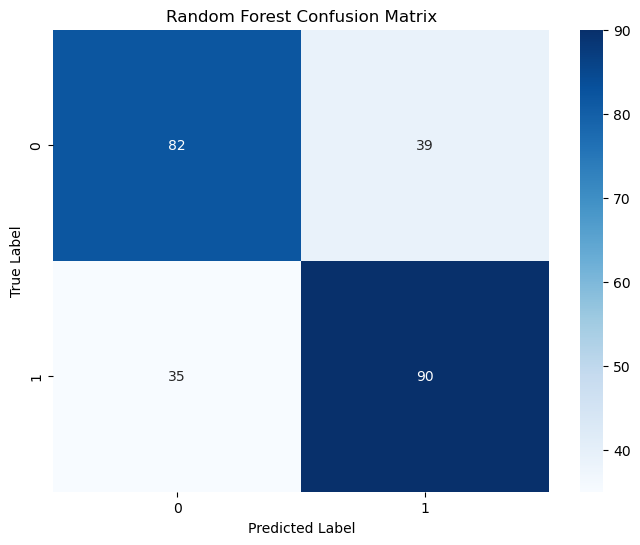

              precision    recall  f1-score   support

           0       0.70      0.68      0.69       121
           2       0.70      0.72      0.71       125

    accuracy                           0.70       246
   macro avg       0.70      0.70      0.70       246
weighted avg       0.70      0.70      0.70       246

ROC AUC Score: 0.7691900826446281
Random Forest Accuracy: 0.70


In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
best_rf = grid_search.best_estimator_

# Accuracy
print("Train Accuracy:", best_rf.score(X_train, y_train))
print("Test Accuracy:", best_rf.score(X_test, y_test))

# Predictions
y_pred = best_rf.predict(X_test)
y_prob = best_rf.predict_proba(X_test)[:, 1]

# Metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.2f}")

**After one round of hyperparameter tuning, the Random Forest model achieved a cross-validation score of 72.6% and a test accuracy of 69.9%, showing ok generalization performance. While training accuracy (83.6%) is higher, suggesting some overfitting, the model still performs reasonably well on unseen data. This is better than before the first tuning of hyperaparmeters. The ROC AUC score of 76.9% reflects a good overall ability to distinguish between classes. 
The classification report shows balanced performance across both classes, with similar precision, recall, and F1-scores. Future improvements could include further hyperparameter tuning, exploring feature selection, or experimenting with alternative models such as XG Boost.**

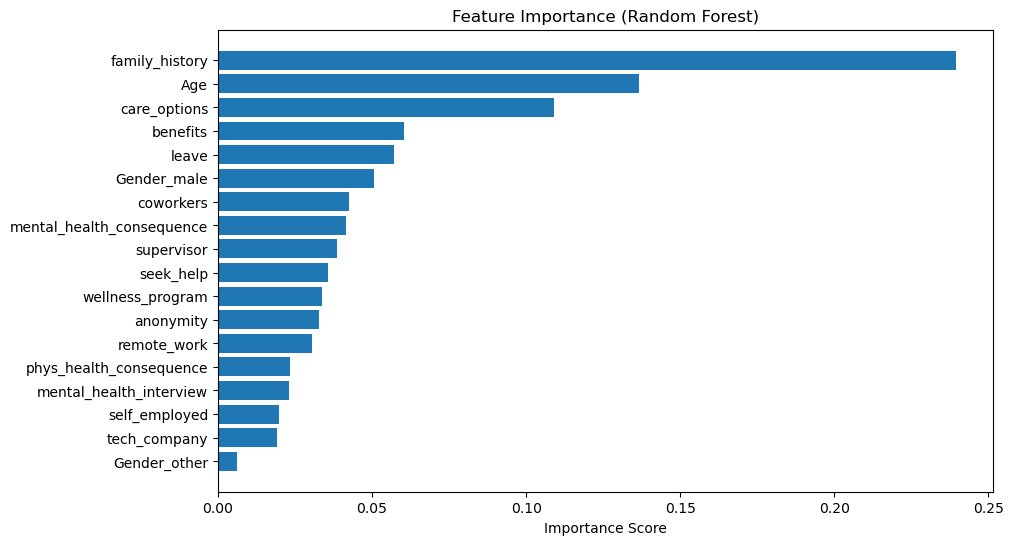

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming rf is your trained RandomForest model
# and X_train is your training DataFrame

importances = best_rf.feature_importances_
feature_names = X_train.columns

# Create DataFrame for better visualization
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.title("Feature Importance (Random Forest)")
plt.show()


The feature importance graph from the Random Forest model indicates that family history is the most influential predictor in determining whether a person seeks treatment for menatl health. This suggests that individuals with a known family history significantly impact the model’s classification decisions. Other features like age and care options available to them also contribute but to a lesser extent. This insight could inform further analysis or targeted interventions.